# 합성곱 연산

## 합성곱 구현

In [1]:
import numpy as np

w = np.array([2, 1, 5, 3])
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])

w_r = np.flip(w)    # 배열 뒤집기
print(w_r)

[3 5 1 2]


In [2]:
for i in range(6):
    print(np.dot(x[i:i + 4], w_r))

63
48
49
28
21
20


In [3]:
# scipy 이용한 합성곱 구현
from scipy.signal import convolve

convolve(x, w, mode='valid')

array([63, 48, 49, 28, 21, 20])

In [4]:
# 교차상관과의 차이: 합성곱과 달리 배열을 뒤집지 않음
from scipy.signal import correlate

correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

## 패딩(padding)과 스트라이드(stride)
* 패딩: 원본 배열의 양 끝에 빈 원소 추가
* 스트라이드: 미끄러지는 배열의 간격을 조절하는 것
* 개념 적용에 따라 valid padding, full padding, same padding 으로 부름

In [ ]:
# valid padding: 원본 배열에 패딩 추가하지 않고 미끄러지는 배열이 원본 배열 끝으로 갈 때까지 교차 상관 수행
# valid padding 결과로 얻는 배열 크기는 원본 배열보다 항상 작음

In [5]:
# full padding: 원본 배열의 모든 요소가 동일하게 연산에 참여하는 패딩 방식
correlate(x, w, mode='full')

# zero padding: 원본 배열 원소가 연산에 동일하게 참여하도록 하기 위해 원본 배열 양 끝에 가상의 원소를 추가하는데, 이때 0을 가상의 원소로 사용하므로 zero padding 이라 함

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

In [6]:
# same padding: 출력 배열의 길이를 원본 배열의 길이와 동일하게 제로 패딩을 추가함
correlate(x, w, mode='same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

* 스트라이드: 미끄러지는 간격 조정
    * 합성곱 신경망을 만들 때는 스트라이드를 일반적으로 1로 지정

## 2차원 배열에서의 합성곱

In [7]:
# 합성곱 신경망은 대부분 2차원 배열에 대한 합성곱을 사용함

# 2차원 원본배열
x = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
# 미끄러지는 배열
w = np.array([
    [2, 0], [0, 0]
])

from scipy.signal import correlate2d

correlate2d(x, w, mode='valid')

array([[ 2,  4],
       [ 8, 10]])

In [8]:
correlate2d(x, w, mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

## Tensorflow 를 이용한 합성곱: `conv2d()`

In [9]:
import tensorflow as tf

# 2차원 배열을 4차원 배열로 바꾸어 합성곱 수행
# 입력 자료형을 실수(float)로 바꾸기
# 배치와 컬러 채널: 1
x_4d = x.astype(np.float).reshape(1, 3, 3, 1)
w_4d = w.reshape(2, 2, 1, 1)

c_out = tf.nn.conv2d(x_4d, w_4d, strides=1, padding='SAME')
c_out.numpy().reshape(3, 3)

# `conv2d()` 함수에 전달되는 매개변수 값은 4차원 배열임!

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]])

# 풀링 연산

* 합성곱 신경망 구조
    * 합성곱층: 합성곱이 일어나는 층
    * 풀링층: 풀링이 일어나는 층
* 특성 맵(feature map): 합성곱층과 풀링층에서 만들어진 결과
* 풀링: 특성 맵을 스캔하며 최댓값을 고르거나 평균값을 계산하는 것

* 최대 풀링(max pooling): 최댓값을 고르는 방식
    * 풀링 영역의 크기: 2 x 2
    * 스트라이드: 풀링의 한 모서리 크기로 지정(여기서는 2) - 풀링 영역이 겹치지 않도록 함
    * 가장 큰 특징을 유지시킴 - 이미지 분류에 알맞음
* 평균 풀링(average pooling): 풀링 영역의 평균값 계산
    * 합성곱층을 통과하는 특징을 희석시킬 가능성이 높음
    * 가장 큰 특성의 값을 상쇄

In [11]:
x = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])
x = x.reshape(1, 4, 4, 1)

p_out = tf.nn.max_pool2d(x, ksize=2, strides=2, padding='VALID')
p_out.numpy().reshape(2, 2)

array([[ 6.,  8.],
       [14., 16.]], dtype=float32)

## ReLU 함수

* 주로 합성곱층에 적용되는 활성화 함수로, 합성곱 신경망의 성능을 높여줌
* 0보다 큰 값은 그대로 통과시키고 0보다 작은 값은 0으로 만듦

In [12]:
# ReLU 함수 구현
def relu(x):
    return np.maximum(x, 0)

x = np.array([-1, 2, -3, 4, -5])
relu(x)

array([0, 2, 0, 4, 0])

In [13]:
# tensorflow에서 제공하는 `relu()` 함수
r_out = tf.nn.relu(x)
# Tensor 객체를 numpy 로 변환
r_out.numpy()

array([0, 2, 0, 4, 0])

## ReLU 함수의 도함수
* 입력이 0보다 크면 1(x > 0), 입력이 0보다 작으면 0(x ≤ 0)

# 합성곱 신경망 만들기

In [29]:
class ConvolutionNetwork:
    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        # 합성곱의 커널 개수
        self.n_kernels = n_kernels
        # 커널 크기
        self.kernel_size = 3
        # 옵티마이저
        self.optimizer = None
        # 합성곱층의 가중치
        self.conv_w = None
        # 합성곱층의 절편
        self.conv_b = None
        # 은닉층의 뉴런 개수
        self.units = units
        # 배치 크기
        self.batch_size = batch_size
        # 은닉층의 가중치
        self.w1 = None
        # 은닉층의 절편
        self.b1 = None
        # 출력층의 가중치
        self.w2 = None
        # 출력층의 절편
        self.b2 = None
        # 은닉층의 활성화 출력
        self.a1 = None
        # 훈련 손실
        self.losses = []
        # 검증 손실
        self.val_losses = []
        # 학습률
        self.lr = learning_rate
    
    def forpass(self, x):
        # 3 x 3 합성곱 연산
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # ReLU 활성화 함수 적용
        r_out = tf.nn.relu(c_out)
        # 2 x 2 최대 풀링 적용
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        # 첫 번째 배치 자원을 제외하고 출력을 일괄로 펼침
        f_out = tf.reshape(p_out, [x.shape[0], -1])
        # 첫 번째 층의 선형식 계산
        z1 = tf.matmul(f_out, self.w1) + self.b1
        # 활성화 함수 적용
        a1 = tf.nn.relu(z1)
        # 두 번째 층의 선형식 계산
        z2 = tf.matmul(a1, self.w2) + self.b2    
        return z2
    
    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)
        self.w2 = tf.Variable(g((self.units, n_classes)))
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])
        self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        # epoch 만큼 반복
        for i in range(epochs):
            print('epoch:', i, end=' ')
            # 제너레이터 함수에서 반환된 미니 배치 순환
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                # 배치 손실 기록
                batch_losses.append(self.get_loss(x_batch, y_batch))
            print()
            # 배치 손실 평균 계산하여 훈련 손실값으로 저장
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실 계산
            self.val_losses.append(self.get_loss(x_val, y_val))
    
    # 미니 배치 제너레이터 함수
    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size
        idxs = np.random.permutation(np.arange(len(x)))
        x = x[idxs]
        y = y[idxs]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            # batch_size만큼 슬라이싱하여 반환
            yield x[start:end], y[start:end]
    
    def training(self, x, y):
        m = len(x)
        with tf.GradientTape() as tape:
            # 정방향 계산
            z = self.forpass(x)
            # 손실 계산
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)
        
        weights_lst = [
            self.conv_w, self.conv_b,
            self.w1, self.b1, self.w2, self.b2
        ]
        # 가중치에 대한 gradient 계산
        grads = tape.gradient(loss, weights_lst)
        self.optimizer.apply_gradients(zip(grads, weights_lst))
    
    def predict(self, x):
        # 정방향 계산
        z = self.forpass(x)
        # 가장 큰 값의 인덱스 반환
        return np.argmax(z.numpy(), axis=1)
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True 비율 반환
        return np.mean(self.predict(x) == np.argmax(y, axis=1))
    
    def get_loss(self, x, y):
        # 정방향 계산
        z = self.forpass(x)
        # 손실을 계산하여 저장
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

In [30]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [31]:
from sklearn.model_selection import train_test_split

# 훈련-검증 세트 준비
x_train, x_val, y_train, y_val = train_test_split(
    x_train_all, y_train_all, stratify=y_train_all, test_size=0.2,
    random_state=42
)

# 원-핫 인코딩으로 변환
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

# 입력 데이터 준비
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [32]:
x_train.shape

(48000, 28, 28, 1)

In [33]:
# 데이터 전처리
x_train = x_train / 255
x_val = x_val / 255

# 모델 훈련
cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size=128, learning_rate=0.01)
cn.fit(x_train, y_train_encoded, x_val=x_val, y_val=y_val_encoded, epochs=20)

epoch: 0 .......................................................................................................................................................................................................................................................................................................................................................................................
epoch: 1 .......................................................................................................................................................................................................................................................................................................................................................................................
epoch: 2 .............................................................................................................................................................................................................................

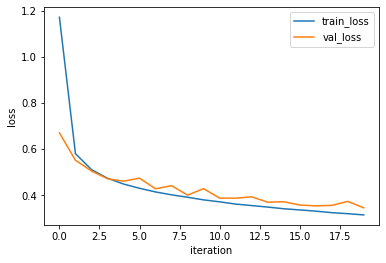

In [34]:
import matplotlib.pyplot as plt

plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [35]:
cn.score(x_val, y_val_encoded)

0.8810833333333333